In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('iris.csv')


1. Wczytanie danych.


In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris Setosa
1,4.9,3.0,1.4,0.2,Iris Setosa
2,4.7,3.2,1.3,0.2,Iris Setosa
3,4.6,3.1,1.5,0.2,Iris Setosa
4,5.0,3.6,1.4,0.2,Iris Setosa


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


4. Sprawdzenie liczby gatunków irysów.


In [6]:
num_species = df['species'].nunique()

print(f"Liczba unikalnych gatunków irysów: {num_species}")

Liczba unikalnych gatunków irysów: 3


5. Wykres punktowy zależności długości płatka w funkcji szerokości płatka, dane różnicowane za pomocą gatunku/rodzaju.

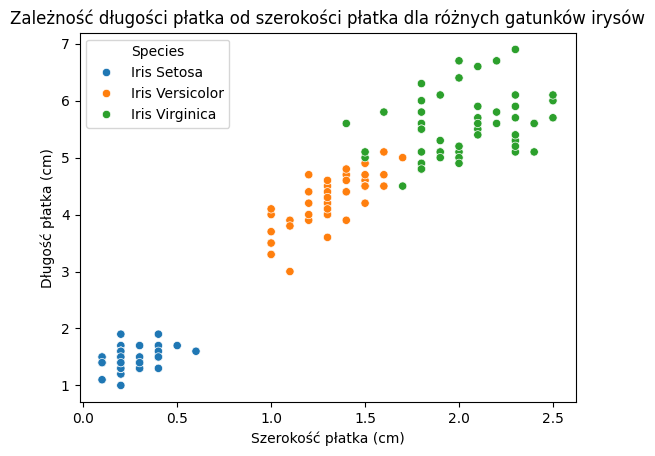

In [7]:
sns.scatterplot(x='petal_width', y='petal_length', hue='species', data=df)
plt.legend(title='Species')
plt.xlabel('Szerokość płatka (cm)')
plt.ylabel('Długość płatka (cm)')
plt.title('Zależność długości płatka od szerokości płatka dla różnych gatunków irysów')
plt.show()


6. Wykres punktowy zależności długości kielicha w funkcji szerokości kielicha, dane różnicowane za pomocą gatunku/rodzaju

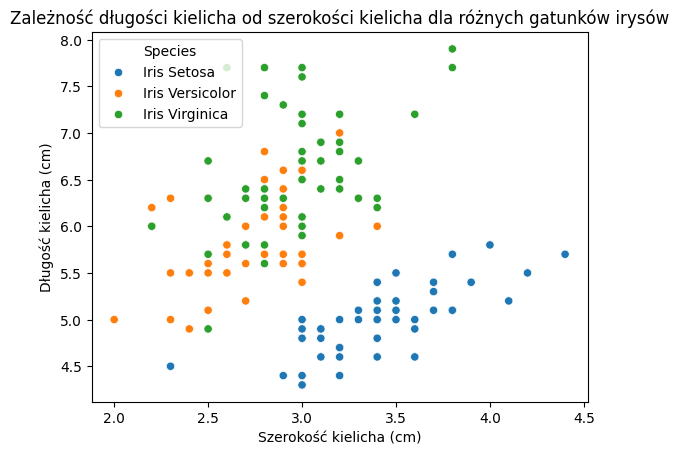

In [8]:
sns.scatterplot(x='sepal_width', y='sepal_length', hue='species', data=df)
plt.legend(title='Species')
plt.xlabel('Szerokość kielicha (cm)')
plt.ylabel('Długość kielicha (cm)')
plt.title('Zależność długości kielicha od szerokości kielicha dla różnych gatunków irysów')
plt.show()

7. Wykres porównawczgo składającego się z macierzy par wszystkich zmiennych, różnicowanych na podstawie kolumny 'species'.

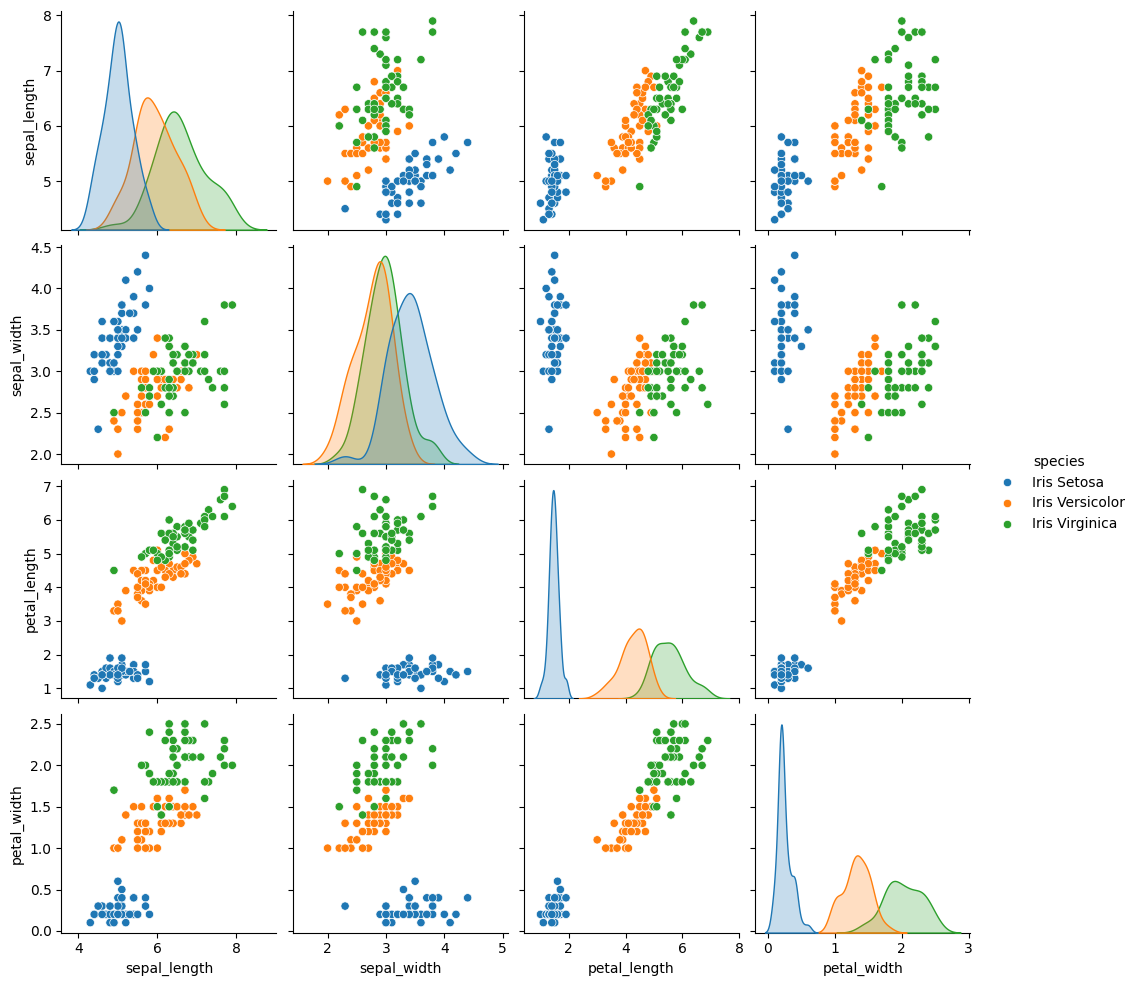

In [9]:
sns.pairplot(df,hue='species')


8. Mapa (heatmapa) korelacji.


In [10]:
matrix = df.drop('species', axis=1)
correlation_matrix = matrix.corr()


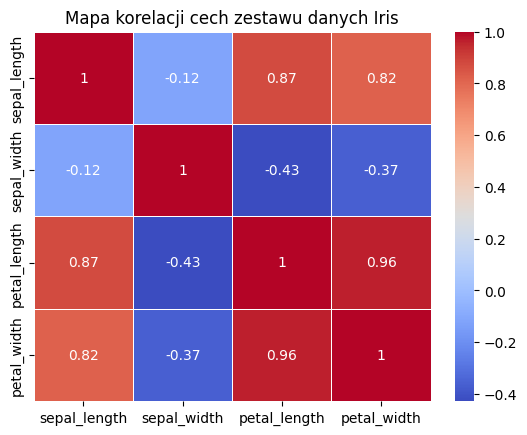

In [11]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa korelacji cech zestawu danych Iris')
plt.show()

PCA na danych skalowanych:


1. Skalowanie danych -> standaryzacja.


In [12]:
scaler = StandardScaler()
matrix.columns = matrix.columns.astype(str)
features_standardized = scaler.fit_transform(matrix)
features_standardized

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [13]:
scaled_df = pd.DataFrame(features_standardized, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
scaled_df

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


2. Wyznaczenie 2 składowych głównych.


In [14]:
n_components=2
pca = PCA(n_components=2)
components = pca.fit_transform(features_standardized)
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [15]:
components

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

3. Jak dużą część zmienności wyjaśniają poszczególne składowe główne?


In [16]:

explained_variance_percentage = pca.explained_variance_ratio_ * 100
print(explained_variance_percentage)

[72.96244541 22.85076179]


Pierwsza głowna składowa wyjaśnia 72.96244541 % zmienności, druga 22.85076179 %  zmienności.

4. Jakie wagi zostały przypisane poszczególnym cechom podczas wyznaczania składowych głównych?

In [17]:
weights_pc1 = pca.components_[0]
print("Wagi dla PC1:", weights_pc1)
weights_pc2 = pca.components_[1]
print("Wagi dla PC2:", weights_pc2)

Wagi dla PC1: [ 0.52106591 -0.26934744  0.5804131   0.56485654]
Wagi dla PC2: [0.37741762 0.92329566 0.02449161 0.06694199]


5. Jak wyznaczona jest pierwsza składowa główna PC1 dla zbioru danych?

In [18]:
pc1_values_scaled = scaled_df.dot(weights_pc1)
pc1_values_scaled

0     -2.264703
1     -2.080961
2     -2.364229
3     -2.299384
4     -2.389842
         ...   
145    1.870503
146    1.564580
147    1.521170
148    1.372788
149    0.960656
Length: 150, dtype: float64

6. Jak wyznaczona jest druga składowa główna PC2 dla zbioru danych?


In [19]:
pc2_values_scaled = scaled_df.dot(weights_pc2)
pc2_values_scaled

0      0.480027
1     -0.674134
2     -0.341908
3     -0.597395
4      0.646835
         ...   
145    0.386966
146   -0.896687
147    0.269069
148    1.011254
149   -0.024332
Length: 150, dtype: float64

7. Ile składowych głównych jest potrzebnych do wyjaśnienia 98% wariancji?


In [20]:
n_components=2
pca2 = PCA(n_components=0.98)
pca2.fit_transform(features_standardized)
pca2.n_components_

3

8. Wyznaczenie 3 składowych głównych.

In [21]:
pca_3_components = PCA(n_components=3)
components_3 = pca_3_components.fit_transform(matrix)
components_3

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

9. Jak dużą część zmienności wyjaśniają poszczególne składowe główne?

In [22]:
explained_variance_percentage_2 = pca_3_components.explained_variance_ratio_ * 100
print(explained_variance_percentage_2)

[92.46187232  5.30664831  1.71026098]


Pierwsza głowna składowa wyjaśnia 92.46187232 % zmienności, druga 5.30664831 %  zmienności, a trzecia 1.71026098 %.

10. Wyznaczenie składowych głównych w zależności od liczby parametrów obiektu.


In [23]:
n_components_values = [1, 2, 3, 4]  
explained_variance_ratios1 = []

for n_components in n_components_values:
    pca_n_components = PCA(n_components=n_components)
    pca_n_components.fit(scaled_df)
    explained_variance_ratios1.append(pca_n_components.explained_variance_ratio_.sum())

print("Liczba składowych głównych:", n_components_values)
print("Suma procentowej części zmienności:", explained_variance_ratios1 )


Liczba składowych głównych: [1, 2, 3, 4]
Suma procentowej części zmienności: [0.7296244541329988, 0.9581320720000164, 0.9948212908928451, 0.9999999999999999]


11. Wykres zależności wariancji wyjaśnionej w funkcji liczby wymiarów.


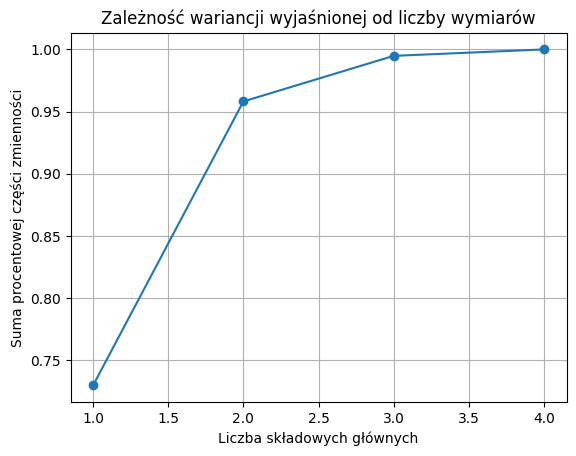

In [24]:

plt.plot(n_components_values, explained_variance_ratios1, marker='o')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Suma procentowej części zmienności')
plt.title('Zależność wariancji wyjaśnionej od liczby wymiarów')
plt.grid(True)
plt.show()

PCA na danych oryginalnych:


In [40]:
n_components=2

pca3 = PCA(n_components=2)
components3 = pca3.fit_transform(matrix)
components3

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

2. Jak dużą część zmienności wyjaśniają poszczególne składowe główne?


In [26]:

explained_variance_percentage3 = pca3.explained_variance_ratio_ * 100
print(explained_variance_percentage3)

[92.46187232  5.30664831]


Pierwsza główmna składowa 92.46187232% , druga - 5.30664831%

3. Jakie wagi zostały przypisane poszczególnym cechom podczas wyznaczania składowych głównych?

In [43]:
weights_pc1_3 = pca3.components_[0]
print("Wagi dla PC1:", weights_pc1_3)
weights_pc2_3_2 = pca3.components_[1]
print("Wagi dla PC2:", weights_pc2_3_2)

Wagi dla PC1: [ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Wagi dla PC2: [ 0.65658877  0.73016143 -0.17337266 -0.07548102]


4. Jak wyznaczona jest pierwsza składowa główna PC1 dla zbioru danych?


In [44]:
pc1_values_scaled_3 = matrix.dot(weights_pc1_3)
pc1_values_scaled_3

0      2.818240
1      2.788223
2      2.613375
3      2.757022
4      2.773649
         ...   
145    7.446475
146    7.029532
147    7.266711
148    7.403307
149    6.892554
Length: 150, dtype: float64

5. Jak wyznaczona jest druga składowa główna PC2 dla zbioru danych?


In [41]:
pc2_values_scaled_3= matrix.dot(weights_pc2_3_2)
pc2_values_scaled_3

0      5.646350
1      5.149951
2      5.182003
3      5.008654
4      5.653707
         ...   
145    5.514485
146    4.951636
147    5.405811
148    5.443581
149    5.044292
Length: 150, dtype: float64

6. Ile składowych głównych jest potrzebnych do wyjaśnienia 98 % wariancji?


In [30]:
n_components=2
pca_3 = PCA(n_components=0.98)
pca_3.fit_transform(matrix)
pca_3.n_components_

3

7. Wyznaczenie 3 składowych głównych.


In [31]:
pca_3_components_3 = PCA(n_components=3)
components_3_3 = pca_3_components_3.fit_transform(matrix)
components_3_3

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

8. Jak dużą część zmienności wyjaśniają poszczególne składowe główne?


In [32]:
explained_variance_percentage_3_3 = pca_3_components_3.explained_variance_ratio_ * 100
print(explained_variance_percentage_3_3)

[92.46187232  5.30664831  1.71026098]


9. Wyznaczenie składowych głównych w zależności od liczby parametrów obiektu.


In [33]:
n_components_values1 = [1, 2, 3, 4]  
explained_variance_ratios3 = []

for n_components in n_components_values1:
    pca_n_components = PCA(n_components=n_components)
    pca_n_components.fit(matrix)
    explained_variance_ratios3.append(pca_n_components.explained_variance_ratio_.sum())

print("Liczba składowych głównych:", n_components_values1)
print("Suma procentowej części zmienności:", explained_variance_ratios3 )

Liczba składowych głównych: [1, 2, 3, 4]
Suma procentowej części zmienności: [0.9246187232017271, 0.977685206318795, 0.9947878161267247, 1.0]


10. Wykres zależności wariancji wyjaśnionej w funkcji liczby wymiarów.


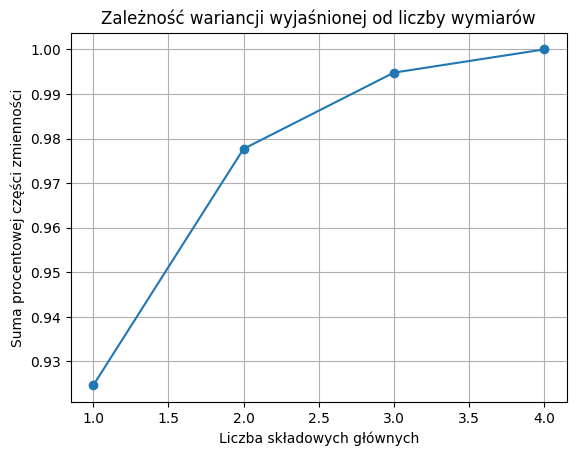

In [34]:
plt.plot(n_components_values1, explained_variance_ratios3, marker='o')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Suma procentowej części zmienności')
plt.title('Zależność wariancji wyjaśnionej od liczby wymiarów')
plt.grid(True)
plt.show()

1. Wizualizacja danych na płaszczyźnie PC1-PC2 (obiekty należące do różnych klas mają zostać oznaczone różnymi kolorami) - dane oryginalne. Czy dane są dobrze zoróżnialne? Wyjaśnienie.

Text(0.5, 1.0, 'PC1-PC2 dla danych oryginalnych')

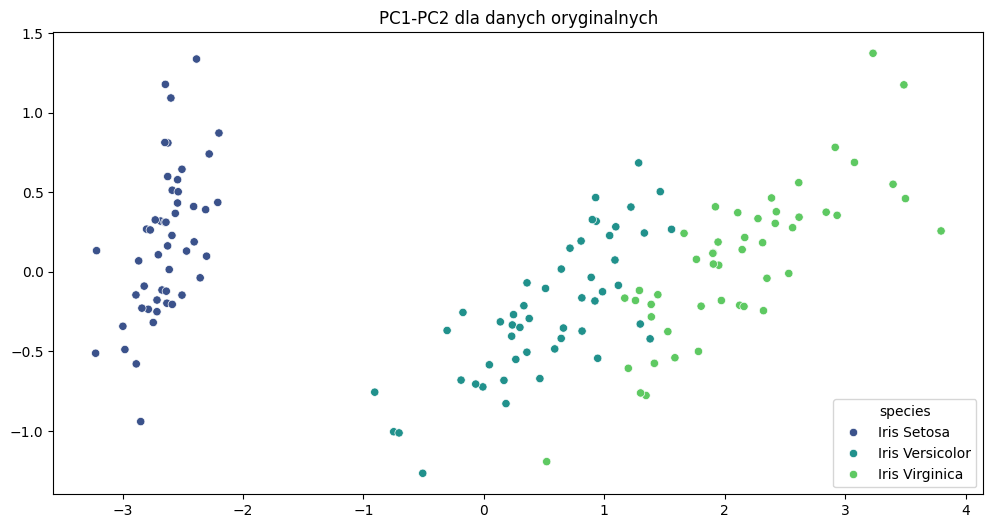

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=components3[:, 0], y=components3[:, 1], hue=df['species'], palette='viridis')
plt.title('PC1-PC2 dla danych oryginalnych')

Dane w zbiorze są rozróżnialne, najbardziej rozróżnialnym zbiorem jest zbiór Iris Setosa

2. Wizualizacja danych na płaszczyźnie PC1-PC2 (obiekty należące do różnych klas mają zostać oznaczone różnymi kolorami) - dane skalowane. Czy dane są dobrze zoróżnialne? Wyjaśnienie.

Text(0.5, 1.0, 'PC1-PC2 dla danych skalowanych')

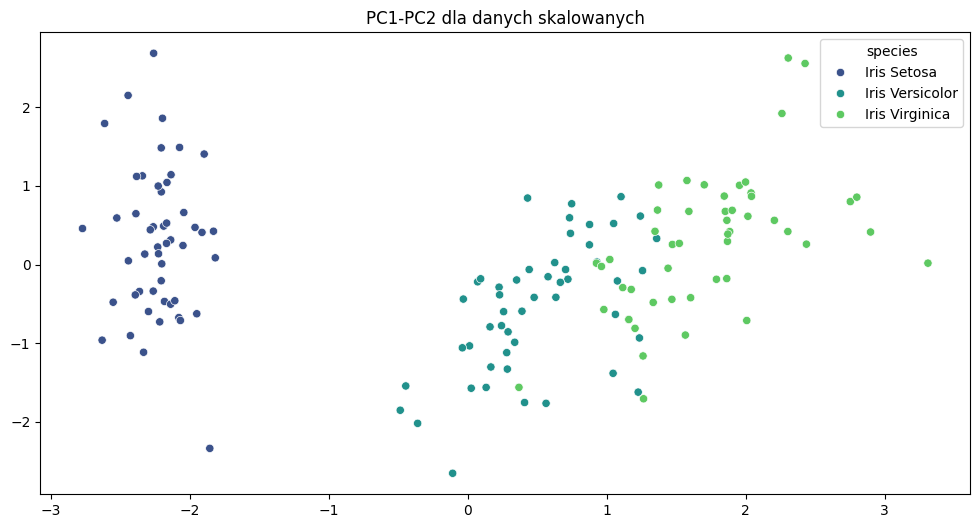

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=df['species'], palette='viridis')
plt.title('PC1-PC2 dla danych skalowanych')

Dane w zbiorze są rozróżnialne, najbardziej rozróżnialnym zbiorem jest zbiór Iris Setosa

3. Wizualizacja danych w przestrzeni PC1-PC2-PCA3 (obiekty należące do różnych klas mają zostać oznaczone różnymi kolorami) - dane oryginalne. Czy dane są dobrze zoróżnialne? Wyjaśnienie.

In [39]:
class_labels = pd.factorize(df['species'])[0]
class_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

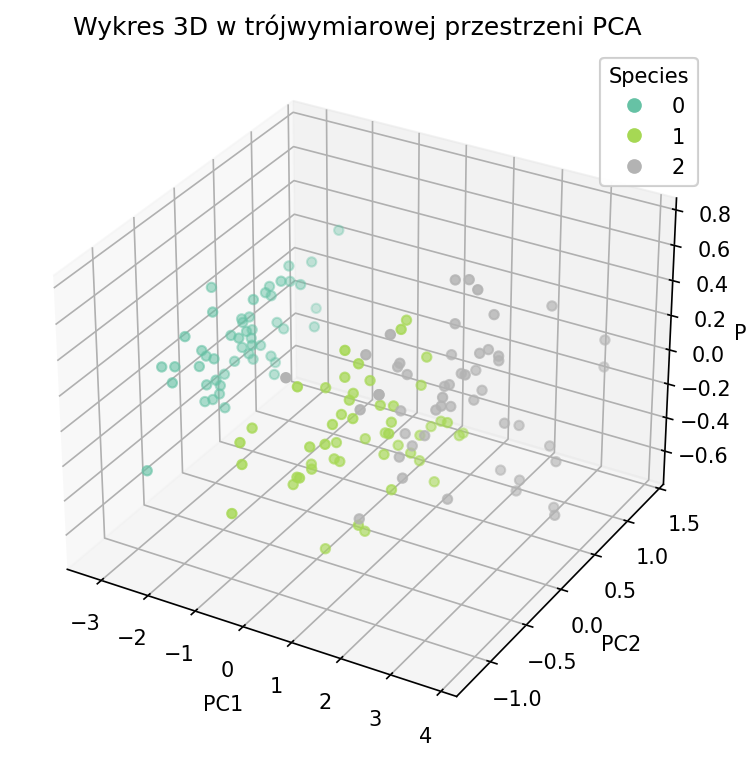

In [37]:

class_labels = pd.factorize(df['species'])[0]

plt.figure(figsize=(8, 6), dpi=150)
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(xs=components_3_3[:, 0], ys=components_3_3[:, 1], zs=components_3_3[:, 2], c=class_labels, cmap='Set2')
legend = ax.legend(*scatter.legend_elements(), title='Species')
ax.add_artist(legend)
ax.set_title('Wykres 3D w trójwymiarowej przestrzeni PCA ')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

Dane w zbiorze są rozróżnialne, najbardziej rozróżnialnym zbiorem jest zbiór 0:  Iris Setosa

4. Wizualizacja danych w przestrzeni PC1-PC2-PCA3 (obiekty należące do różnych klas mają zostać oznaczone różnymi kolorami) - dane skalowane. Czy dane są dobrze zoróżnialne? Wyjaśnienie.

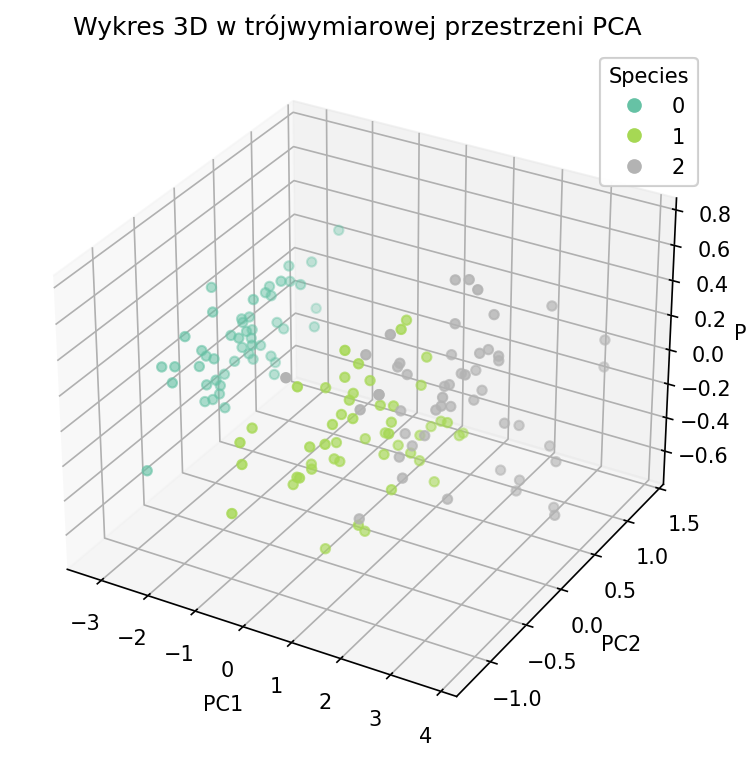

In [38]:
class_labels = pd.factorize(df['species'])[0]

plt.figure(figsize=(8, 6), dpi=150)
ax = plt.axes(projection='3d')
scatter = ax.scatter3D(xs=components_3[:, 0], ys=components_3[:, 1], zs=components_3[:, 2], c=class_labels, cmap='Set2')
legend = ax.legend(*scatter.legend_elements(), title='Species')
ax.add_artist(legend)
ax.set_title('Wykres 3D w trójwymiarowej przestrzeni PCA ')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()

Dane w zbiorze są rozróżnialne, najbardziej rozróżnialnym zbiorem jest zbiór 0:  Iris Setosa